In [1]:
#신경 단어벡터 시각화를 사용-> 고차원 단어를 2차원으로 시각화.
from __future__ import print_function
import os

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.stem import PorterStemmer

import string
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt # 시각화 위한 라이브럴


In [2]:
#텍스트 전처리 함수
def preprocessing(text):
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())
    tokens = [word for sent in nltk.sent_tokenize(text2) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]    
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens)    
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()

    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             

    return pre_proc_text

In [4]:
fin = open("alice_in_wonderland.txt", "rb") #alice데이터셋
lines = []

for line in fin:
    line = line.strip().decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(preprocessing(line))
fin.close()

In [5]:
import collections
counter = collections.Counter()
for line in lines:
    for word in nltk.word_tokenize(line):
        counter[word.lower()]+=1
word2idx = {w:(i+1) for i,(w,_) in enumerate(counter.most_common())} #데이터수가 많은 단어순으로 정렬        
idx2word = {v:k for k,v in word2idx.items()}

In [6]:
word2idx # 단어 : 인덱스

{'say': 1,
 'alic': 2,
 'littl': 3,
 'go': 4,
 'think': 5,
 'get': 6,
 'look': 7,
 'one': 8,
 'know': 9,
 'like': 10,
 'come': 11,
 'begin': 12,
 'would': 13,
 'see': 14,
 'thing': 15,
 'could': 16,
 'time': 17,
 'make': 18,
 'queen': 19,
 'king': 20,
 'well': 21,
 'turtl': 22,
 'head': 23,
 'way': 24,
 'take': 25,
 'hatter': 26,
 'mock': 27,
 'quit': 28,
 'gryphon': 29,
 'much': 30,
 'find': 31,
 'rabbit': 32,
 'first': 33,
 'voic': 34,
 'cat': 35,
 'never': 36,
 'tri': 37,
 'must': 38,
 'mous': 39,
 'turn': 40,
 'duchess': 41,
 'tone': 42,
 'round': 43,
 'seem': 44,
 'back': 45,
 'two': 46,
 'dormous': 47,
 'great': 48,
 'tell': 49,
 'white': 50,
 'eye': 51,
 'hand': 52,
 'use': 53,
 'last': 54,
 'march': 55,
 'noth': 56,
 'put': 57,
 'long': 58,
 'repli': 59,
 'day': 60,
 'larg': 61,
 'ask': 62,
 'dear': 63,
 'right': 64,
 'door': 65,
 'minut': 66,
 'moment': 67,
 'word': 68,
 'speak': 69,
 'talk': 70,
 'hare': 71,
 'next': 72,
 'give': 73,
 'foot': 74,
 'grow': 75,
 'sit': 76,
 're

In [7]:
idx2word # 인덱스 : 단어

{1: 'say',
 2: 'alic',
 3: 'littl',
 4: 'go',
 5: 'think',
 6: 'get',
 7: 'look',
 8: 'one',
 9: 'know',
 10: 'like',
 11: 'come',
 12: 'begin',
 13: 'would',
 14: 'see',
 15: 'thing',
 16: 'could',
 17: 'time',
 18: 'make',
 19: 'queen',
 20: 'king',
 21: 'well',
 22: 'turtl',
 23: 'head',
 24: 'way',
 25: 'take',
 26: 'hatter',
 27: 'mock',
 28: 'quit',
 29: 'gryphon',
 30: 'much',
 31: 'find',
 32: 'rabbit',
 33: 'first',
 34: 'voic',
 35: 'cat',
 36: 'never',
 37: 'tri',
 38: 'must',
 39: 'mous',
 40: 'turn',
 41: 'duchess',
 42: 'tone',
 43: 'round',
 44: 'seem',
 45: 'back',
 46: 'two',
 47: 'dormous',
 48: 'great',
 49: 'tell',
 50: 'white',
 51: 'eye',
 52: 'hand',
 53: 'use',
 54: 'last',
 55: 'march',
 56: 'noth',
 57: 'put',
 58: 'long',
 59: 'repli',
 60: 'day',
 61: 'larg',
 62: 'ask',
 63: 'dear',
 64: 'right',
 65: 'door',
 66: 'minut',
 67: 'moment',
 68: 'word',
 69: 'speak',
 70: 'talk',
 71: 'hare',
 72: 'next',
 73: 'give',
 74: 'foot',
 75: 'grow',
 76: 'sit',
 77:

In [8]:
xs = []
ys = []

for line in lines:
    embedding = [word2idx[w.lower()] for w in nltk.word_tokenize(line)] 
    triples = list(nltk.trigrams(embedding)) #tri-gram추출
    w_lefts = [x[0] for x in triples]
    w_centers = [x[1] for x in triples]
    w_rights = [x[2] for x in triples]
    xs.extend(w_centers)
    ys.extend(w_lefts)
    xs.extend(w_centers)
    ys.extend(w_rights)
print (len(word2idx))

vocab_size = len(word2idx)+1
print(vocab_size)

1786
1787


In [9]:
pip install nltk==3.4

  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436386 sha256=288efd9709058a521316039180b5b4d97aaad1d14e7307b59387e73033dd6d5c
  Stored in directory: c:\users\yanghyunkyu\appdata\local\pip\cache\wheels\e3\8d\39\e3aa34880de366c8b3e4584c4f5f3777289005a4b1553a9c4c
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5
Note: you may need to restart the kernel to use updated packages.


In [11]:
ohe = OneHotEncoder(categories = [range(vocab_size)])
X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense()
Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()
Xtrain, Xtest, Ytrain, Ytest,xstr,xsts = train_test_split(X, Y,xs, test_size=0.3,random_state=42) #train:test = 7:3분할, 랜덤시드값 고정
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(9707, 1787) (4161, 1787) (9707, 1787) (4161, 1787)


In [12]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model

np.random.seed(42)
BATCH_SIZE = 128
NUM_EPOCHS = 20


input_layer = Input(shape = (Xtrain.shape[1],),name="input")
first_layer = Dense(300,activation='relu',name = "first")(input_layer)
first_dropout = Dropout(0.5,name="firstdout")(first_layer)

second_layer = Dense(2,activation='relu',name="second")(first_dropout) #2차원으로 축소함.

third_layer = Dense(300,activation='relu',name="third")(second_layer)
third_dropout = Dropout(0.5,name="thirdout")(third_layer)

fourth_layer = Dense(Ytrain.shape[1],activation='softmax',name = "fourth")(third_dropout)

history = Model(input_layer,fourth_layer) # input-> inputlayer로 설정.
history.compile(optimizer = "rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
history.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS, verbose=1,validation_split = 0.2)

Epoch 1/20
61/61 [==============================] - 1s 16ms/step - loss: 6.9231 - accuracy: 0.0379 - val_loss: 6.4253 - val_accuracy: 0.0479
Epoch 2/20
61/61 [==============================] - 1s 14ms/step - loss: 6.3954 - accuracy: 0.0425 - val_loss: 6.4435 - val_accuracy: 0.0479
Epoch 3/20
61/61 [==============================] - 1s 14ms/step - loss: 6.3458 - accuracy: 0.0442 - val_loss: 6.4708 - val_accuracy: 0.0479
Epoch 4/20
61/61 [==============================] - 1s 13ms/step - loss: 6.3246 - accuracy: 0.0447 - val_loss: 6.4944 - val_accuracy: 0.0479
Epoch 5/20
61/61 [==============================] - 1s 14ms/step - loss: 6.3117 - accuracy: 0.0438 - val_loss: 6.5139 - val_accuracy: 0.0479
Epoch 6/20
61/61 [==============================] - 1s 14ms/step - loss: 6.2966 - accuracy: 0.0439 - val_loss: 6.5396 - val_accuracy: 0.0479
Epoch 7/20
61/61 [==============================] - 1s 14ms/step - loss: 6.2885 - accuracy: 0.0439 - val_loss: 6.5527 - val_accuracy: 0.0479
Epoch 8/20
61

In [14]:
encoder = Model(history.input,history.get_layer("second").output)

reduced_X = encoder.predict(Xtest) #인코더 모델로 차원축소된 잠재변수 예측

final_pdframe = pd.DataFrame(reduced_X) #데이터 프레임구조로 변환.
final_pdframe.columns = ["xaxis","yaxis"]
final_pdframe["word_indx"] = xsts
final_pdframe["word"] = final_pdframe["word_indx"].map(idx2word)

In [15]:
rows = random.sample(list(final_pdframe.index), 100)
vis_df = final_pdframe.loc[rows]

labels = list(vis_df["word"])
xvals = list(vis_df["xaxis"])
yvals = list(vis_df["yaxis"])


In [16]:
final_pdframe

,xaxis,yaxis,word_indx,word
0,0.217960,0.852250,38,must
1,0.088301,0.690391,246,box
2,0.488563,0.715416,168,notic
3,0.000000,0.765042,7,look
4,0.507234,0.147360,248,play
...,...,...,...,...
4156,0.346451,0.676527,14,see
4157,0.814170,0.008343,2,alic
4158,0.204413,0.665038,183,mouth
4159,0.155429,0.316264,17,time


In [17]:
vis_df

,xaxis,yaxis,word_indx,word
218,0.165122,0.326353,1100,flash
823,0.155429,0.316264,17,time
971,0.415495,0.483656,44,seem
43,0.182606,0.366153,480,stick
1107,0.369893,0.130568,578,deepli
...,...,...,...,...
2560,0.191757,0.830915,40,turn
3204,0.017359,0.580739,31,find
1626,0.029809,0.335276,419,love
1925,0.783554,0.775463,239,whether


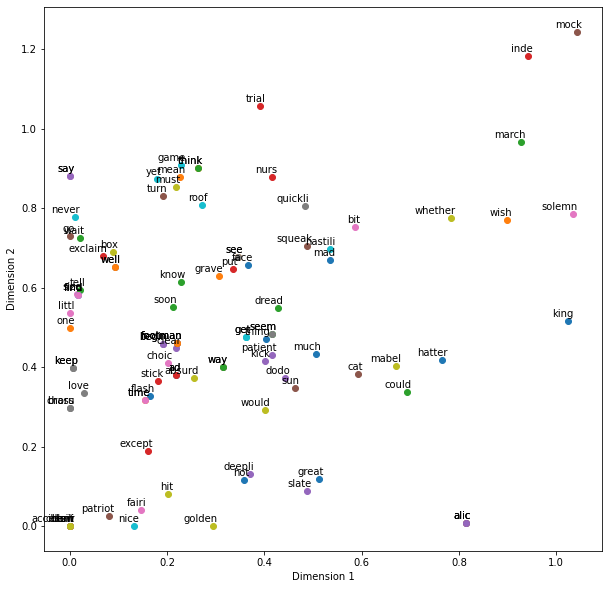

In [18]:
#시각화
plt.figure(figsize=(10, 10))  
for i, label in enumerate(labels):
    x = xvals[i]
    y = yvals[i]
    plt.scatter(x, y)
    plt.annotate(label,xy=(x, y),xytext=(5, 2),textcoords='offset points',
                 ha='right',va='bottom')

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
